# QM assessment2 - code for Average Attainment 8 Score

## import packages

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms

## read file

In [2]:
# Read csv file
df = pd.read_csv('gcse_results_clear.csv')

In [3]:
df.sample()

,code,area,total_2016,total_2017,total_2018,total_2019,a8_2016,a8_2017,a8_2018,a8_2019,...,girl_2018,girl_2019,a8_g_2016,a8_g_2017,a8_g_2018,a8_g_2019,p8_g_2016,p8_g_2017,p8_g_2018,p8_g_2019
7,E09000009,Ealing,"2,781","2,722","2,853","2,956",50.9,48.7,50.0,50.9,...,"1,460","1,449",53.5,51.5,52.6,54.1,0.44,0.61,0.76,0.84


In [4]:
df.shape

(32, 38)

In [82]:
print(df.columns.values)

['code' 'area' 'total_2016' 'total_2017' 'total_2018' 'total_2019'
 'a8_2016' 'a8_2017' 'a8_2018' 'a8_2019' 'p8_2016' 'p8_2017' 'p8_2018'
 'p8_2019' 'boy_2016' 'boy_2017' 'boy_2018' 'boy_2019' 'a8_b_2016'
 'a8_b_2017' 'a8_b_2018' 'a8_b_2019' 'p8_b_2016' 'p8_b_2017' 'p8_b_2018'
 'p8_b_2019' 'girl_2016' 'girl_2017' 'girl_2018' 'girl_2019' 'a8_g_2016'
 'a8_g_2017' 'a8_g_2018' 'a8_g_2019' 'p8_g_2016' 'p8_g_2017' 'p8_g_2018'
 'p8_g_2019']


## Find the range of axes

In [5]:
print('boy max: ',max(max(df['a8_b_2016']),max(df['a8_b_2017']),max(df['a8_b_2018']),max(df['a8_b_2019'])))
print('boy min: ',min(min(df['a8_b_2016']),min(df['a8_b_2017']),min(df['a8_b_2018']),min(df['a8_b_2019'])))
print('girl max: ',max(max(df['a8_g_2016']),max(df['a8_g_2017']),max(df['a8_g_2018']),max(df['a8_g_2019'])))
print('girl min: ',min(min(df['a8_g_2016']),min(df['a8_g_2017']),min(df['a8_g_2018']),min(df['a8_g_2019'])))

boy max:  57.3
boy min:  40.4
girl max:  60.5
girl min:  47.0


## Boxplot the Average Attainment 8 Score

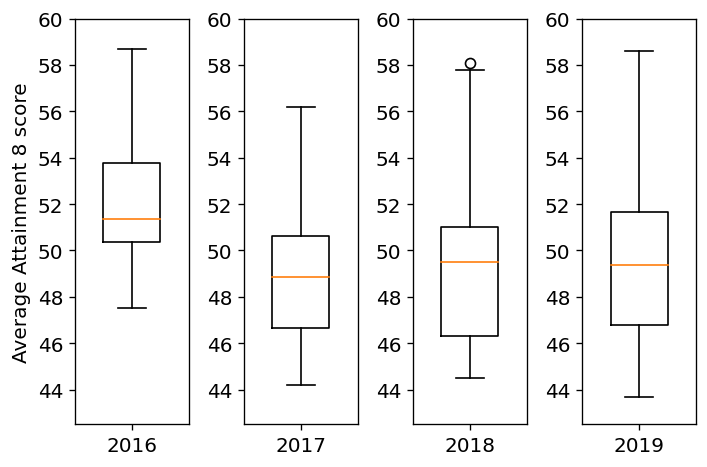

In [126]:
plt.figure(dpi=120)
ax1 = plt.subplot(1,4,1)
ax2 = plt.subplot(1,4,2)
ax3 = plt.subplot(1,4,3)
ax4 = plt.subplot(1,4,4)

plt.sca(ax1)
plt.boxplot(df.a8_2016,widths=0.5)
plt.tick_params(labelsize=12)
plt.ylabel("Average Attainment 8 score",fontsize=12)
plt.xticks([1],['2016'],fontsize=12)
plt.ylim([42.5,60])

plt.sca(ax2)
plt.boxplot(df.a8_2017,widths=0.5)
plt.tick_params(labelsize=12)
plt.xticks([1],['2017'],fontsize=12)
plt.ylim([42.5,60])

plt.sca(ax3)
plt.boxplot(df.a8_2018,widths=0.5)
plt.tick_params(labelsize=12)
plt.xticks([1],['2018'],fontsize=12)
plt.ylim([42.5,60])

plt.sca(ax4)
plt.boxplot(df.a8_2019,widths=0.5)
plt.tick_params(labelsize=12)
plt.xticks([1],['2019'],fontsize=12)
plt.ylim([42.5,60])

# And save the boxplot
plt.tight_layout()
plt.savefig('Score_boxpolt')

## Boxplot the Average Attainment 8 Score grouped by gender and year

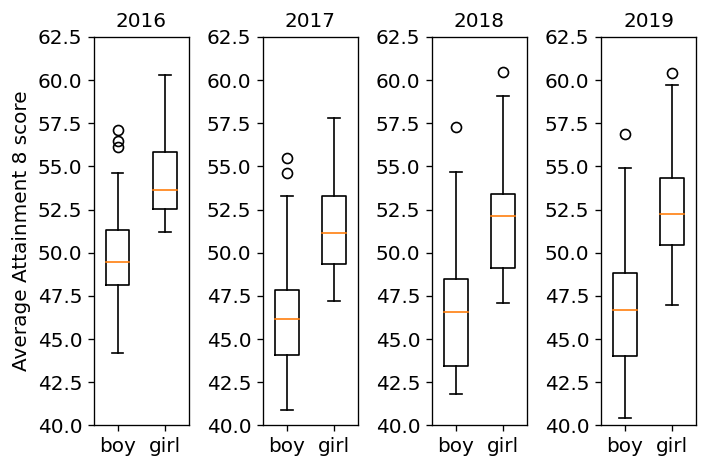

In [129]:
plt.figure(dpi=120)
ax1 = plt.subplot(1,4,1)
ax2 = plt.subplot(1,4,2)
ax3 = plt.subplot(1,4,3)
ax4 = plt.subplot(1,4,4)
df_2016=df['a8_b_2016'],df['a8_g_2016']
df_2017=df['a8_b_2017'],df['a8_g_2017']
df_2018=df['a8_b_2018'],df['a8_g_2018']
df_2019=df['a8_b_2019'],df['a8_g_2019']

plt.sca(ax1)
plt.boxplot(df_2016,widths=0.5)
plt.xticks([1,2], ["boy",'girl'],fontsize=12)
plt.tick_params(labelsize=12)
plt.ylabel("Average Attainment 8 score",fontsize=12)
plt.title("2016",fontsize=12)
plt.ylim([40,62.5])

plt.sca(ax2)
plt.boxplot(df_2017,widths=0.5)
plt.xticks([1,2], ["boy",'girl'],fontsize=12)
plt.tick_params(labelsize=12)
plt.title("2017",fontsize=12)
plt.ylim([40,62.5])

plt.sca(ax3)
plt.boxplot(df_2018,widths=0.5)
plt.xticks([1,2], ["boy",'girl'],fontsize=12)
plt.tick_params(labelsize=12)
plt.title("2018",fontsize=12)
plt.ylim([40,62.5])

plt.sca(ax4)
plt.boxplot(df_2019,widths=0.5)
plt.xticks([1,2], ["boy",'girl'],fontsize=12)
plt.tick_params(labelsize=12)
plt.title("2019",fontsize=12)
plt.ylim([40,62.5])

# And save the boxplot
plt.tight_layout()
plt.savefig('Score_gender_boxpolt')

## scatter plot 

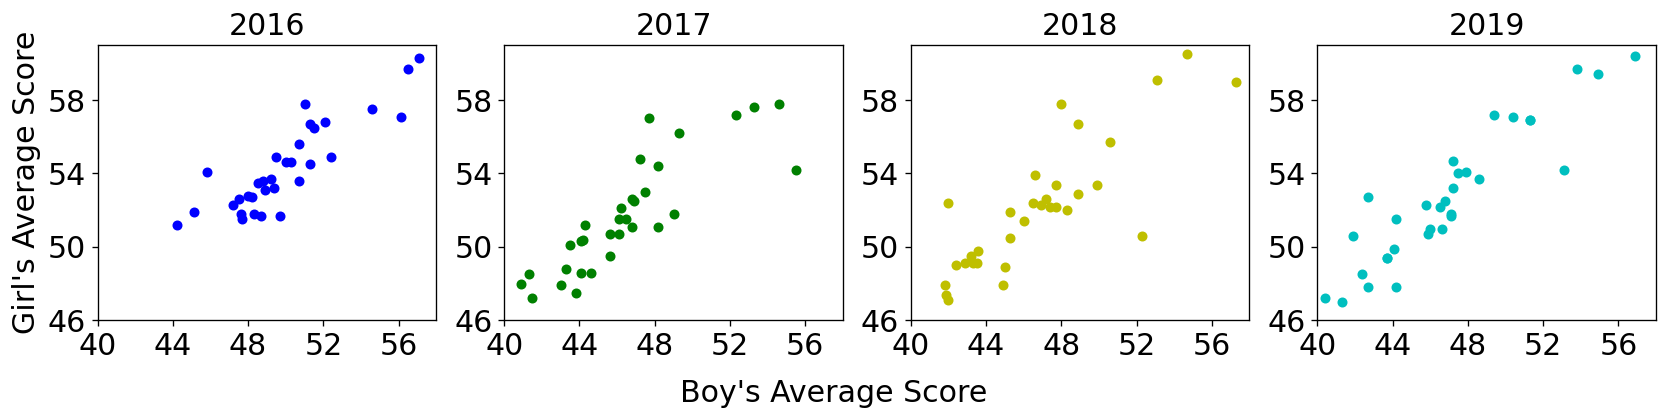

In [123]:
fig, axes = plt.subplots(2,2,figsize=(14,3.6),dpi=120)
ax1 = plt.subplot(1,4,1)
ax2 = plt.subplot(1,4,2)
ax3 = plt.subplot(1,4,3)
ax4 = plt.subplot(1,4,4)
my_x_ticks = np.arange(40, 58, 4)
my_y_ticks = np.arange(46, 61, 4)

plt.sca(ax1)
plt.xlim([40,58])
plt.ylim([46,61])
plt.ylabel('Girl\'s Average Score',fontsize=18)
plt.title('2016',fontsize=18)
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.tick_params(labelsize=18)
plt.plot(df['a8_b_2016'],df['a8_g_2016'],'b.',label='2016',markersize=10)

plt.sca(ax2)
plt.xlim([40,58])
plt.ylim([46,61])
plt.title('2017',fontsize=18)
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.tick_params(labelsize=18)
plt.plot(df['a8_b_2017'],df['a8_g_2017'],'g.',label='2016',markersize=10)

plt.sca(ax3)
plt.xlim([40,58])
plt.ylim([46,61])
plt.title('2018',fontsize=18)
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.tick_params(labelsize=18)
plt.plot(df['a8_b_2018'],df['a8_g_2018'],'y.',label='2016',markersize=10)

plt.sca(ax4)
plt.xlim([40,58])
plt.ylim([46,61])
plt.title('2019',fontsize=18)
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.tick_params(labelsize=18)
plt.plot(df['a8_b_2019'],df['a8_g_2019'],'c.',label='2016',markersize=10)
plt.suptitle('Boy\'s Average Score',x=0.5,y=0,fontsize=18)
plt.tight_layout()

# And save the plot
plt.savefig('Score_scatter_plot')

## Caculate the Pearson Correlation Coefficient between girl and boy

In [28]:
r_2016 = np.corrcoef(df['a8_b_2016'], df['a8_g_2016'])
r_2017 = np.corrcoef(df['a8_b_2017'], df['a8_g_2017'])
r_2018 = np.corrcoef(df['a8_b_2018'], df['a8_g_2018'])
r_2019 = np.corrcoef(df['a8_b_2019'], df['a8_g_2019'])
print('2016:')
print('The Pearson Correlation Coefficient is:',round(r_2016[0][1],4))
print('2017:')
print('The Pearson Correlation Coefficient is:',round(r_2017[0][1],4))
print('2018:')
print('The Pearson Correlation Coefficient is:',round(r_2018[0][1],4))
print('2019:')
print('The Pearson Correlation Coefficient is:',round(r_2019[0][1],4))

2016:
The Pearson Correlation Coefficient is: 0.8707
2017:
The Pearson Correlation Coefficient is: 0.8544
2018:
The Pearson Correlation Coefficient is: 0.8379
2019:
The Pearson Correlation Coefficient is: 0.9193


## Simple linear Regression 

In [36]:
X_2016_boy = sms.add_constant(df['a8_b_2016'])
Y_2016_girl = df['a8_g_2016']
regression_model_a = sms.OLS(Y_2016_girl, X_2016_boy)
regression_model_b = regression_model_a.fit()
print(regression_model_b.summary())

X_2017_boy = sms.add_constant(df['a8_b_2017'])
Y_2017_girl = df['a8_g_2017']
regression_model_c = sms.OLS(Y_2017_girl, X_2017_boy)
regression_model_d = regression_model_c.fit()
print(regression_model_d.summary())

X_2018_boy = sms.add_constant(df['a8_b_2018'])
Y_2018_girl = df['a8_g_2018']
regression_model_e = sms.OLS(Y_2018_girl, X_2018_boy)
regression_model_f = regression_model_e.fit()
print(regression_model_f.summary())

X_2019_boy = sms.add_constant(df['a8_b_2019'])
Y_2019_girl = df['a8_g_2019']
regression_model_g = sms.OLS(Y_2019_girl, X_2019_boy)
regression_model_h = regression_model_g.fit()
print(regression_model_h.summary())

                            OLS Regression Results                            
Dep. Variable:              a8_g_2016   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     94.00
Date:                Thu, 03 Dec 2020   Prob (F-statistic):           9.35e-11
Time:                        13:03:03   Log-Likelihood:                -50.385
No. Observations:                  32   AIC:                             104.8
Df Residuals:                      30   BIC:                             107.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.8529      3.562      5.574      0.0

### Statistics

In [37]:
print('2016:')
gradient_2016  = regression_model_b.params[1]
intercept_2016 = regression_model_b.params[0]
Rsquared_2016  = regression_model_b.rsquared
MSE_2016       = regression_model_b.mse_resid
pvalue_2016    = regression_model_b.f_pvalue
print("gradient  =", gradient_2016)
print("intercept =", intercept_2016)
print("Rsquared  =", Rsquared_2016)
print("MSE       =", MSE_2016)
print("pvalue    =", pvalue_2016)

print('2017:')
gradient_2017  = regression_model_d.params[1]
intercept_2017 = regression_model_d.params[0]
Rsquared_2017  = regression_model_d.rsquared
MSE_2017       = regression_model_d.mse_resid
pvalue_2017    = regression_model_d.f_pvalue
print("gradient  =", gradient_2017)
print("intercept =", intercept_2017)
print("Rsquared  =", Rsquared_2017)
print("MSE       =", MSE_2017)
print("pvalue    =", pvalue_2017)

print('2018:')
gradient_2018  = regression_model_f.params[1]
intercept_2018 = regression_model_f.params[0]
Rsquared_2018  = regression_model_f.rsquared
MSE_2018       = regression_model_f.mse_resid
pvalue_2018    = regression_model_f.f_pvalue
print("gradient  =", gradient_2018)
print("intercept =", intercept_2018)
print("Rsquared  =", Rsquared_2018)
print("MSE       =", MSE_2018)
print("pvalue    =", pvalue_2018)

print('2019:')
gradient_2019  = regression_model_h.params[1]
intercept_2019 = regression_model_h.params[0]
Rsquared_2019  = regression_model_h.rsquared
MSE_2019       = regression_model_h.mse_resid
pvalue_2019    = regression_model_h.f_pvalue
print("gradient  =", gradient_2019)
print("intercept =", intercept_2019)
print("Rsquared  =", Rsquared_2019)
print("MSE       =", MSE_2019)
print("pvalue    =", pvalue_2019)

2016:
gradient  = 0.6902852132327093
intercept = 19.85291430548294
Rsquared  = 0.7580742020238904
MSE       = 1.4560278950588197
pvalue    = 9.351966918522602e-11
2017:
gradient  = 0.7346279128038085
intercept = 17.539802054622896
Rsquared  = 0.7299720658677851
MSE       = 2.655814741501712
pvalue    = 4.947051305347618e-10
2018:
gradient  = 0.7620473763461917
intercept = 16.511342738275303
Rsquared  = 0.7020421772999256
MSE       = 3.855000036184802
pvalue    = 2.204495753372401e-09
2019:
gradient  = 0.8278035346765988
intercept = 13.832575274842
Rsquared  = 0.8451614141483118
MSE       = 2.142603125251775
pvalue    = 1.101602625284983e-13


### Plot the regression

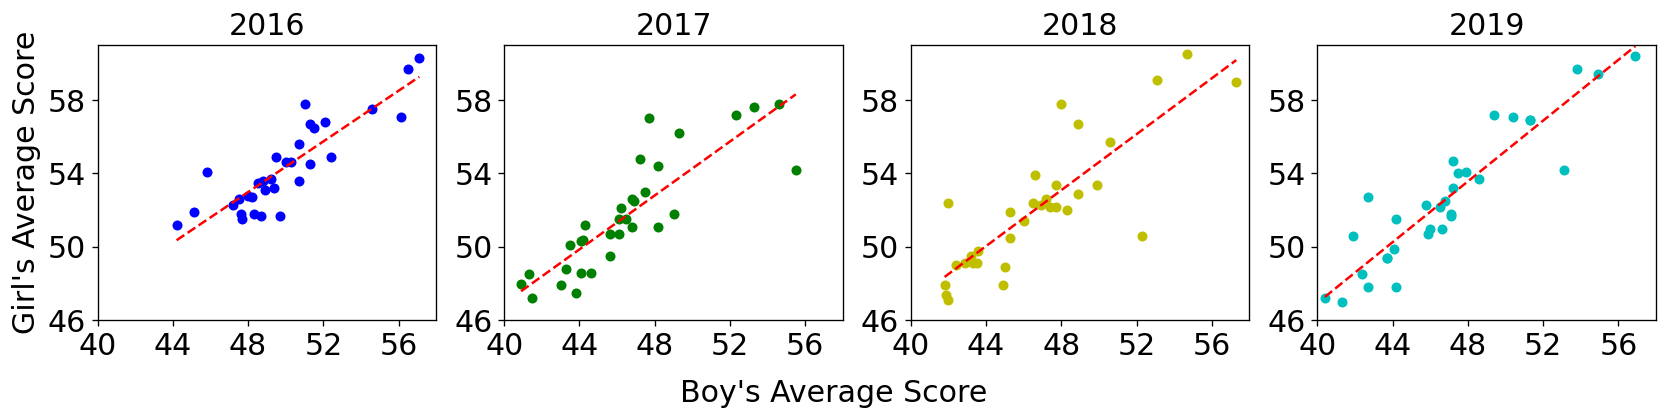

In [122]:
fig, axes = plt.subplots(2,2,figsize=(14,3.6),dpi=120)
ax1 = plt.subplot(1,4,1)
ax2 = plt.subplot(1,4,2)
ax3 = plt.subplot(1,4,3)
ax4 = plt.subplot(1,4,4)

plt.sca(ax1)
plt.xlim([40,58])
plt.ylim([46,61])
plt.ylabel('Girl\'s Average Score',fontsize=18)
plt.title('2016',fontsize=18)
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.tick_params(labelsize=18)
x_lobf = [min(df['a8_b_2016']),max(df['a8_b_2016'])]
y_lobf = [x_lobf[0]*gradient_2016 + intercept_2016,x_lobf[1]*gradient_2016 + intercept_2016]
plt.plot(df['a8_b_2016'],df['a8_g_2016'],'b.',label='2016',markersize=10)
plt.plot(x_lobf,y_lobf,'r--')

plt.sca(ax2)
plt.xlim([40,58])
plt.ylim([46,61])
plt.title('2017',fontsize=18)
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.tick_params(labelsize=18)
x_lobf = [min(df['a8_b_2017']),max(df['a8_b_2017'])]
y_lobf = [x_lobf[0]*gradient_2017 + intercept_2017,x_lobf[1]*gradient_2017 + intercept_2017]
plt.plot(df['a8_b_2017'],df['a8_g_2017'],'g.',label='2017',markersize=10)
plt.plot(x_lobf,y_lobf,'r--')

plt.sca(ax3)
plt.xlim([40,58])
plt.ylim([46,61])
plt.title('2018',fontsize=18)
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.tick_params(labelsize=18)
x_lobf = [min(df['a8_b_2018']),max(df['a8_b_2018'])]
y_lobf = [x_lobf[0]*gradient_2018 + intercept_2018,x_lobf[1]*gradient_2018 + intercept_2018]
plt.plot(df['a8_b_2018'],df['a8_g_2018'],'y.',label='2018',markersize=10)
plt.plot(x_lobf,y_lobf,'r--')

plt.sca(ax4)
plt.xlim([40,58])
plt.ylim([46,61])
plt.title('2019',fontsize=18)
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.tick_params(labelsize=18)
x_lobf = [min(df['a8_b_2019']),max(df['a8_b_2019'])]
y_lobf = [x_lobf[0]*gradient_2019 + intercept_2019,x_lobf[1]*gradient_2019 + intercept_2019]
plt.plot(df['a8_b_2019'],df['a8_g_2019'],'c.',label='2019',markersize=10)
plt.plot(x_lobf,y_lobf,'r--')
plt.suptitle('Boy\'s Average Score',x=0.5,y=0,fontsize=18)
plt.tight_layout()

# Save the regression plot
plt.savefig('Score_regression_figure')

### Residuals vs Fits Plot

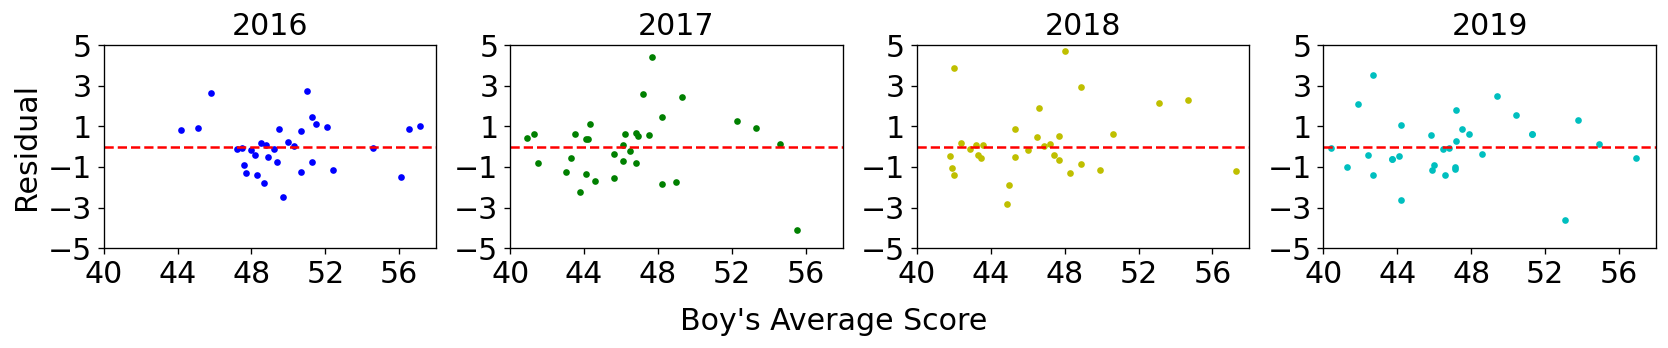

In [124]:
fig, axes = plt.subplots(2,2,figsize=(14,3),dpi=120)
ax1 = plt.subplot(1,4,1)
ax2 = plt.subplot(1,4,2)
ax3 = plt.subplot(1,4,3)
ax4 = plt.subplot(1,4,4)
my_y_ticks = np.arange(-5, 6, 2)

plt.sca(ax1)
plt.xlim([40,58])
plt.ylim([-5,5])
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.title('2016',fontsize=18)
plt.ylabel('Residual',fontsize=18)
x_lobf = [40,58]
y_lobf = [0,0]
plt.tick_params(labelsize=18)
df['2016_residual'] = df['a8_g_2016'] - (df['a8_b_2016']*gradient_2016 + intercept_2016)
plt.plot(df['a8_b_2016'],df['2016_residual'],'b.',x_lobf,y_lobf,'r--')

plt.sca(ax2)
plt.xlim([40,58])
plt.ylim([-5,5])
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.title('2017',fontsize=18)
x_lobf = [40,58]
y_lobf = [0,0]
plt.tick_params(labelsize=18)
df['2017_residual'] = df['a8_g_2017'] - (df['a8_b_2017']*gradient_2017 + intercept_2017)
plt.plot(df['a8_b_2017'],df['2017_residual'],'g.',x_lobf,y_lobf,'r--')

plt.sca(ax3)
plt.xlim([40,58])
plt.ylim([-5,5])
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.title('2018',fontsize=18)
x_lobf = [40,58]
y_lobf = [0,0]
plt.tick_params(labelsize=18)
df['2018_residual'] = df['a8_g_2018'] - (df['a8_b_2018']*gradient_2018 + intercept_2018)
plt.plot(df['a8_b_2018'],df['2018_residual'],'y.',x_lobf,y_lobf,'r--')

plt.sca(ax4)
plt.xlim([40,58])
plt.ylim([-5,5])
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.title('2019',fontsize=18)
x_lobf = [40,58]
y_lobf = [0,0]
plt.tick_params(labelsize=18)
df['2019_residual'] = df['a8_g_2019'] - (df['a8_b_2019']*gradient_2019 + intercept_2019)
plt.plot(df['a8_b_2019'],df['2019_residual'],'c.',x_lobf,y_lobf,'r--')
plt.suptitle('Boy\'s Average Score',x=0.5,y=0,fontsize=18)
plt.tight_layout()

# Save the regression plot
plt.savefig('Score_regression_residual')

### Plot residual density histogram and its kernel density curve

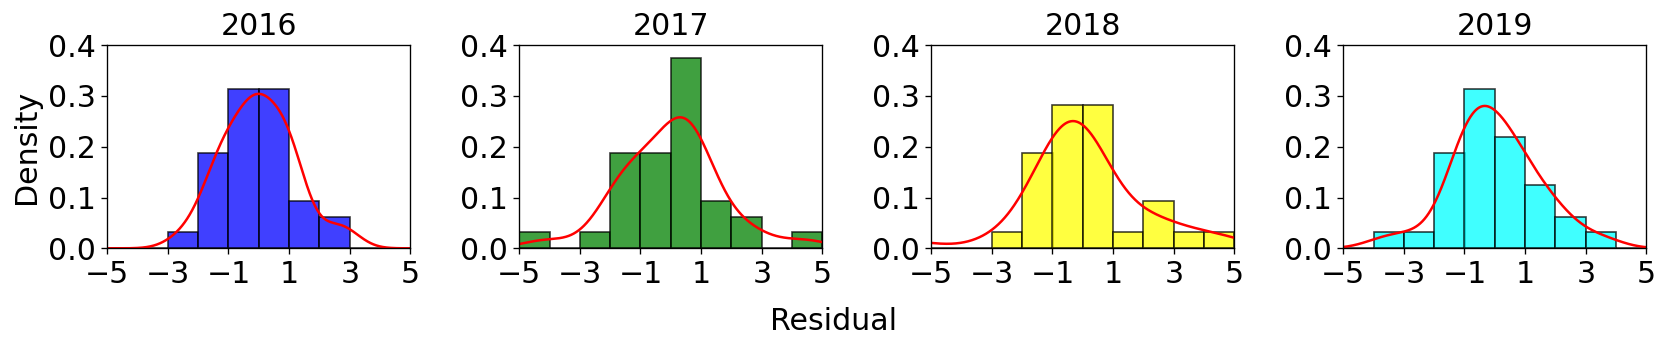

In [131]:
fig, axes = plt.subplots(2,2,figsize=(14,3),dpi=120)
ax1 = plt.subplot(1,4,1)
ax2 = plt.subplot(1,4,2)
ax3 = plt.subplot(1,4,3)
ax4 = plt.subplot(1,4,4)
my_y_ticks_2 = np.arange(0, 0.5, 0.1)

plt.sca(ax1)
df['2016_residual'].plot(kind = 'hist', bins = range(-10,10,1), color = 'blue', edgecolor = 'black', density = True, alpha=0.75)
df['2016_residual'].plot(kind = 'kde', color = 'red')
plt.xticks(my_y_ticks)
plt.yticks(my_y_ticks_2)
plt.xlim(-5,5)
plt.ylabel('Density',fontsize=18)
plt.title('2016',fontsize=18)
plt.tick_params(labelsize=18)

plt.sca(ax2)
df['2017_residual'].plot(kind = 'hist', bins = range(-10,10,1), color = 'green', edgecolor = 'black', density = True, alpha=0.75)
df['2017_residual'].plot(kind = 'kde', color = 'red')
plt.xticks(my_y_ticks)
plt.yticks(my_y_ticks_2)
plt.xlim(-5,5)
plt.ylabel('')
plt.title('2017',fontsize=18)
plt.tick_params(labelsize=18)

plt.sca(ax3)
df['2018_residual'].plot(kind = 'hist', bins = range(-10,10,1), color = 'yellow', edgecolor = 'black', density = True, alpha=0.75)
df['2018_residual'].plot(kind = 'kde', color = 'red')
plt.xticks(my_y_ticks)
plt.yticks(my_y_ticks_2)
plt.xlim(-5,5)
plt.ylabel(' ')
plt.title('2018',fontsize=18)
plt.tick_params(labelsize=18)

plt.sca(ax4)
df['2019_residual'].plot(kind = 'hist', bins = range(-10,10,1), color = 'cyan', edgecolor = 'black', density = True, alpha=0.75)
df['2019_residual'].plot(kind = 'kde', color = 'red')
plt.xticks(my_y_ticks)
plt.yticks(my_y_ticks_2)
plt.xlim(-5,5)
plt.ylabel(' ')
plt.title('2019',fontsize=18)
plt.tick_params(labelsize=18)
plt.suptitle('Residual',x=0.5,y=0,fontsize=18)
plt.tight_layout()

# Save the regression plot
plt.savefig('Score_regression_residual_histogram')